In [8]:
#한글 폰트 다운 및 데이터 불러오기

!apt-get -qq install -y fonts-nanum

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

df= pd.read_excel('서울대기오염_2019.xlsx')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               9491 non-null   object 
 1   측정소명             9491 non-null   object 
 2   미세먼지             9278 non-null   float64
 3   초미세먼지            9288 non-null   float64
 4   오존               9294 non-null   float64
 5   이산화질소
NO2 (ppm)  9285 non-null   float64
 6   일산화탄소
CO (ppm)   9234 non-null   float64
 7   아황산가스
SO2(ppm)   9298 non-null   float64
dtypes: float64(6), object(2)
memory usage: 593.3+ KB


,날짜,측정소명,미세먼지,초미세먼지,오존,이산화질소\nNO2 (ppm),일산화탄소\nCO (ppm),아황산가스\nSO2(ppm)
0,전체,평균,42.0,25.0,0.025,0.028,0.5,0.004
1,2019-12-31,평균,26.0,15.0,0.022,0.016,0.4,0.003
2,2019-12-31,강남구,22.0,14.0,0.025,0.014,0.4,0.003
3,2019-12-31,강동구,27.0,19.0,0.019,0.020,0.4,0.003
4,2019-12-31,강북구,31.0,17.0,0.022,0.022,0.4,0.002


In [9]:
#컬럼명 정리 및 간소화, 날짜 datetime으로 변환

df.columns = [col.split('\n')[0].lower() for col in df.columns]

df.rename(columns={
    '미세먼지': 'pm10',
    '초미세먼지': 'pm2.5',
    '오존': 'o3',
    '이산화질소': 'no2',
    '일산화탄소': 'co',
    '아황산가스': 'so2'
}, inplace=True)

df['datetime'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d', errors='coerce')


df.set_index('datetime', inplace=True)

In [10]:
#결측치 비율 확인

missing_ratio = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing_ratio = missing_ratio[missing_ratio > 1].round(1)
missing_ratio

,0
co,2.7
pm10,2.2
no2,2.2
pm2.5,2.1
o3,2.1
so2,2.0


In [11]:
#결측치 처리 (평균값으로)

df_filled = df.fillna(df.mean(numeric_only=True))
df_filled.head()

,날짜,측정소명,pm10,pm2.5,o3,no2,co,so2
datetime,,,,,,,,
NaT,전체,평균,42.0,25.0,0.025,0.028,0.5,0.004
2019-12-31,2019-12-31,평균,26.0,15.0,0.022,0.016,0.4,0.003
2019-12-31,2019-12-31,강남구,22.0,14.0,0.025,0.014,0.4,0.003
2019-12-31,2019-12-31,강동구,27.0,19.0,0.019,0.020,0.4,0.003
2019-12-31,2019-12-31,강북구,31.0,17.0,0.022,0.022,0.4,0.002


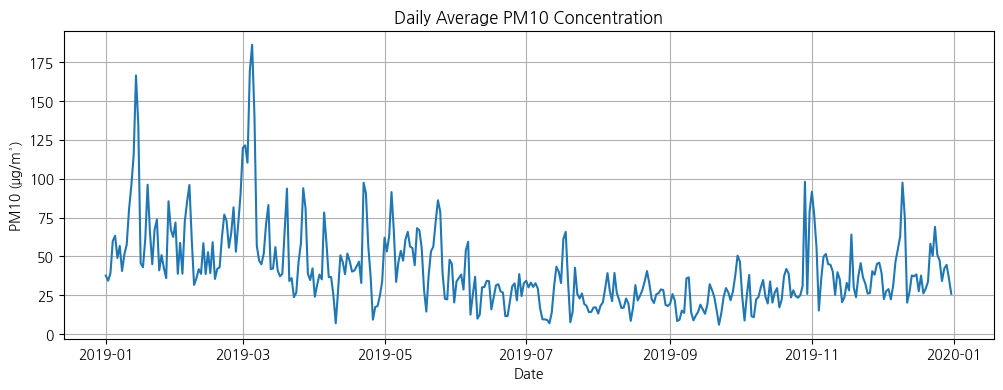

In [13]:
#미세먼지(PM10) 변화 추세 시각화

daily_pm10 = df.groupby(df.index)['pm10'].mean()

plt.figure(figsize=(12, 4))
plt.plot(daily_pm10.index, daily_pm10.values)
plt.title('Daily Average PM10 Concentration')
plt.xlabel('Date')
plt.ylabel('PM10 (μg/m³)')
plt.grid(True)
plt.show()

              pm10        pm2.5           co
count  9491.000000  9491.000000  9491.000000
mean     41.748006    24.921619     0.530626
std      26.440204    18.212963     0.215642
min       3.000000     1.000000     0.100000
25%      25.000000    14.000000     0.400000
50%      36.000000    21.000000     0.500000
75%      51.000000    30.000000     0.600000
max     228.000000   153.000000     2.000000


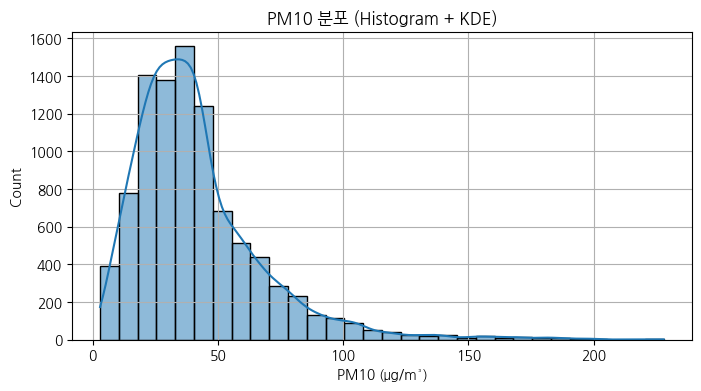

In [16]:
#PM10의 히스토그램과 KDE로 기술 통계 분석, 분포 분석

print(df_filled[['pm10', 'pm2.5', 'co']].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df_filled['pm10'], bins=30, kde=True)
plt.title('PM10 분포 (Histogram + KDE)')
plt.xlabel('PM10 (μg/m³)')
plt.grid(True)
plt.show()


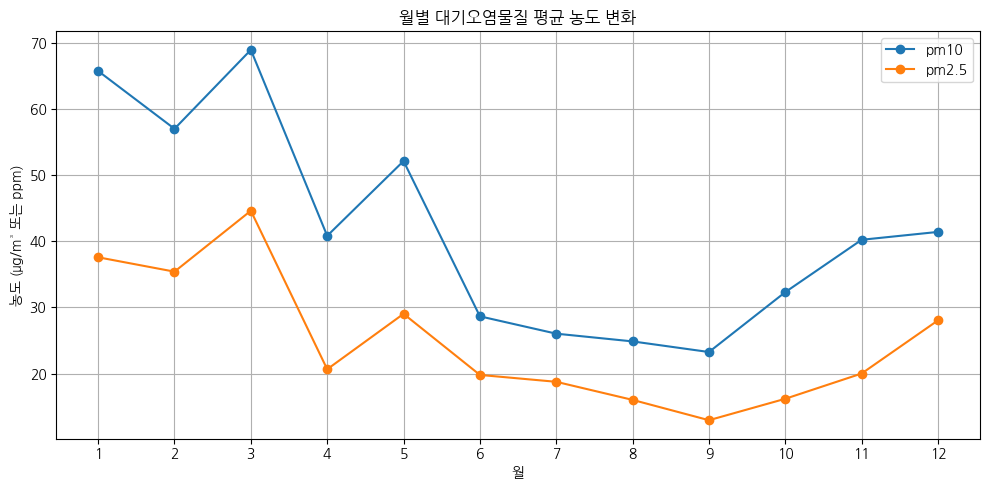

In [17]:
#month로 파생변수 생성하여 월별 미세먼지 및 초미세먼지 농도 변화 시각화

df_filled['month'] = df_filled.index.month

monthly_avg = df_filled.groupby('month')[['pm10', 'pm2.5']].mean()

monthly_avg.plot(figsize=(10, 5), marker='o')
plt.title('월별 대기오염물질 평균 농도 변화')
plt.xlabel('월')
plt.ylabel('농도 (μg/m³ 또는 ppm)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()


          pm10     pm2.5        co        o3       no2       so2  \
측정소명                                                               
강남구   0.446695  0.442686  0.279650  0.073988  0.600700  0.767211   
강동구   0.572387  0.606723  0.326886  0.000000  0.734669  0.353177   
강북구   0.784942  0.368116  0.282793  0.799633  0.087616  0.000000   
강서구   0.895378  0.550615  0.391953  0.686369  0.760548  0.770571   
관악구   1.000000  0.863490  0.243637  0.558397  0.791472  0.566249   

      weighted_score  
측정소명                  
강남구         0.441830  
강동구         0.542381  
강북구         0.519726  
강서구         0.708869  
관악구         0.853384  


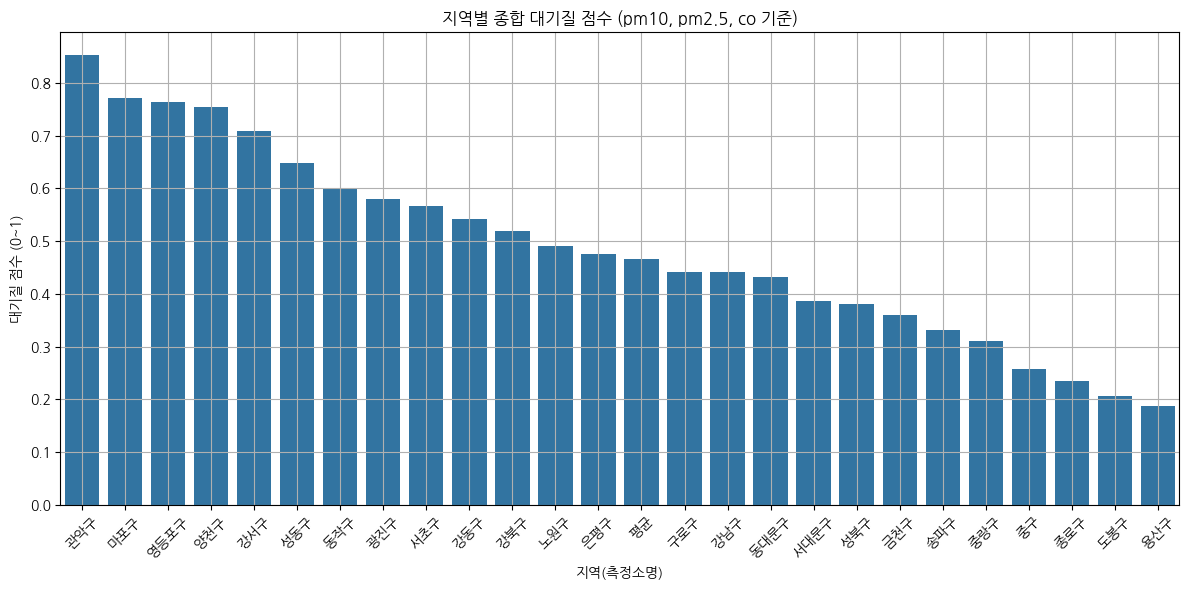

In [28]:
#정규화를 통한 지역별 대기질 점수 측정 및 시각화

from sklearn.preprocessing import MinMaxScaler

region_air_quality = df_filled.groupby('측정소명')[['pm10', 'pm2.5', 'co', 'o3', 'no2', 'so2']].mean()
scaled_df = region_air_quality.copy()
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(scaled_df)
normalized_df = pd.DataFrame(normalized_values, index=scaled_df.index, columns=scaled_df.columns)

weights = {
    'pm10': 0.4,
    'pm2.5': 0.4,
    'o3': 0.05,
    'no2': 0.05,
    'co': 0.05,
    'so2': 0.05
}

normalized_df['weighted_score'] = sum(normalized_df[col] * w for col, w in weights.items())

print(normalized_df.head())

score_sorted = normalized_df.sort_values('weighted_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=score_sorted.index, y=score_sorted['weighted_score'])
plt.title('지역별 종합 대기질 점수 (pm10, pm2.5, co 기준)')
plt.xlabel('지역(측정소명)')
plt.ylabel('대기질 점수 (0~1)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()